# Exploratory Data Analysis of UCI Spambase Dataset

## 1. Introduction
Briefly introduce the dataset and the purpose of the notebook.

## 2. Import Libraries
Import necessary libraries for data analysis and visualization.

## 3. Load the Data
Load the dataset and display the first few rows.

## 4. Data Overview
- Display basic information about the dataset (e.g., number of rows and columns).
- Check for missing values.

## 5. Data Distribution
- Visualize the distribution of the target variable (`is_spam`).
- Visualize the distribution of selected features.

## 6. Feature Correlations
- Compute and visualize correlations between features and the target variable.
- Display a heatmap of feature correlations.

## 7. Feature Analysis
- Analyze and visualize key features (e.g., words or characters frequencies).

## 8. Conclusion
Summarize key findings from the EDA.

Dataset has 4601 rows and 58 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64


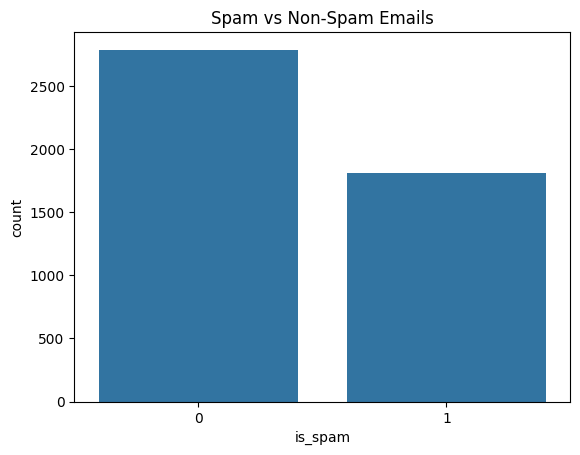

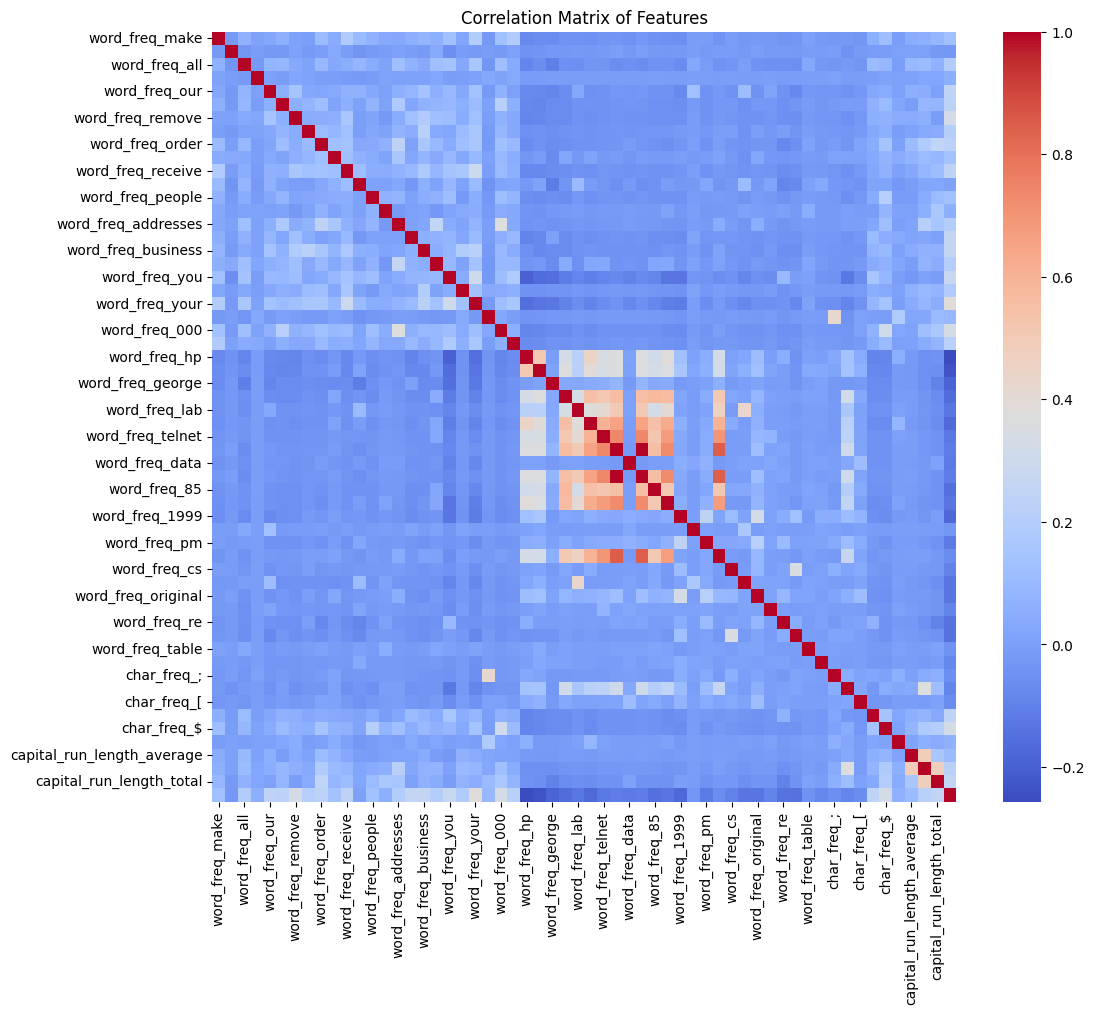

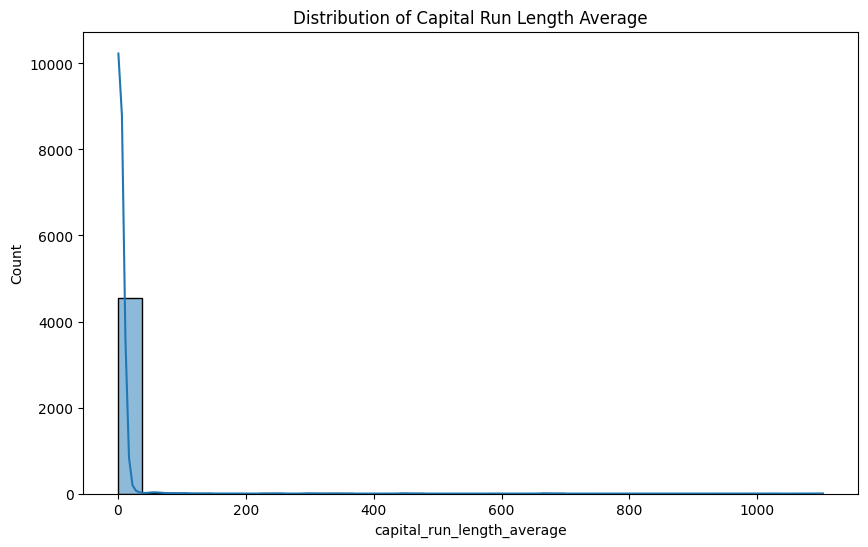

In [15]:
# 2. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Load the Data
df = pd.read_csv('../DATA/spambase.data', header=None)
df.columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
              'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
              'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
              'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
              'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
              'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
              'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
              'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
              'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
              'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
              'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
              'capital_run_length_longest', 'capital_run_length_total', 'is_spam']

# 4. Data Overview
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
print(df.info())

# Check for missing values
print(df.isnull().sum())

# 5. Data Distribution
# Target variable distribution
sns.countplot(x='is_spam', data=df)
plt.title('Spam vs Non-Spam Emails')
plt.show()

# 6. Feature Correlations
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# 7. Feature Analysis
# Example: Distribution of 'capital_run_length_average'
plt.figure(figsize=(10, 6))
sns.histplot(df['capital_run_length_average'], bins=30, kde=True)
plt.title('Distribution of Capital Run Length Average')
plt.show()

# 8. Conclusion
